Index(['ID', 'v_r', 'v_r_e', 'v_LSR', 'sig_v', 'sig_v_e', 'c', 'r_c', 'r_h',
       'mu_V', 'rho_0', 'lg_tc', 'lg_th', 'Name', 'RA', 'DEC', 'L', 'B',
       'R_Sun', 'R_gc', 'X', 'Y', 'Z'],
      dtype='object')
(157, 23)
    bin_label     lg_tc     lg_th  count
16  (6, 7, 5)  7.517143  8.188689     62
26  (7, 7, 5)  7.825625  8.646364     33
12  (6, 6, 5)  8.635455  9.209167     12
23  (7, 6, 5)  8.392000  9.036667      6
25  (7, 7, 4)  7.680000  9.155000      4


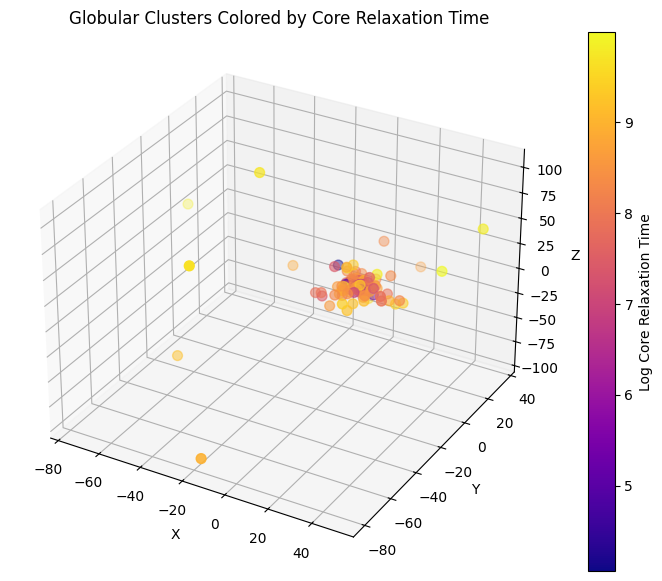

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

partI = pd.read_csv("/Users/ashhadkhan/Desktop/PHYS3116/computational stuff/phys3116_I_don-t_know/data/HarrisPartI.csv")
partIII = pd.read_csv("/Users/ashhadkhan/Desktop/PHYS3116/computational stuff/phys3116_I_don-t_know/data/HarrisPartIII.csv")

# Merge both datasets, based on 'ID' and 
merged = pd.merge(partIII, partI, on='ID', how='inner')  # keeps only clusters in both
print(merged.columns)
print(merged.shape)

n_bins = 10 #no. of bins

# Bin indices for each cluster
merged['x_bin'] = np.digitize(merged['X'], bins=np.linspace(merged['X'].min(), merged['X'].max(), n_bins))
merged['y_bin'] = np.digitize(merged['Y'], bins=np.linspace(merged['Y'].min(), merged['Y'].max(), n_bins))
merged['z_bin'] = np.digitize(merged['Z'], bins=np.linspace(merged['Z'].min(), merged['Z'].max(), n_bins))

merged['bin_label'] = merged.apply(lambda row: (row['x_bin'], row['y_bin'], row['z_bin']), axis=1) #combine


bin_stats = merged.groupby('bin_label')[['lg_tc', 'lg_th']].mean().reset_index() #avg. lag times per bin
bin_counts = merged.groupby('bin_label').size().reset_index(name='count') # no. of clusters per bin
bin_summary = pd.merge(bin_stats, bin_counts, on='bin_label')
print(bin_summary.sort_values('count', ascending=False).head())


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter each cluster colored by core relaxation time
sc = ax.scatter(merged['X'], merged['Y'], merged['Z'], c=merged['lg_tc'], cmap='plasma', s=50)
plt.colorbar(sc, label='Log Core Relaxation Time')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Globular Clusters Colored by Core Relaxation Time')
plt.show()

# it looks like lg_th is increasing as we go outwards, which makes sense because the half-mass relaxation time should be longer for more diffuse clusters further out in the halo
# We do see lg_tc somewhat increasing with radius too, but there is more scatter. This also makes sense since core properties can vary more due to internal dynamics and interactions
# Overall, the trends align with expectations that clusters further out in the halo tend to be less dense and have longer relaxation times.

#begin to look at those clusters which are away from the center and have high relaxation times



In [40]:
#3 least dense bins
least_dense_bin_labels = [(6,6,5), (7,6,5), (7,7,4)]

# clusters in these bins
least_dense_clusters = merged[merged['bin_label'].isin(least_dense_bin_labels)]

# properties of those clusters
print(least_dense_clusters[['ID','Name','X','Y','Z','lg_tc','lg_th','v_r','sig_v']])

           ID         Name     X     Y     Z  lg_tc  lg_th    v_r  sig_v
11   NGC 2298          NaN  -4.3  -9.4  -3.0   7.91   8.84  148.9    NaN
15   NGC 2808          NaN   2.0  -9.2  -1.9   8.24   9.15  101.6   13.4
16        E 3          NaN   2.9  -7.1  -2.6   8.93   8.80    NaN    NaN
18   NGC 3201          NaN   0.6  -4.8   0.7   8.61   9.27  494.0    5.0
22   NGC 4372          NaN   2.9  -4.9  -1.0   8.88   9.59   72.3    NaN
24   NGC 4590         M 68   4.1  -7.2   6.0   8.45   9.27  -94.7    2.5
25   NGC 4833          NaN   3.6  -5.4  -0.9   8.78   9.42  200.2    NaN
28   NGC 5139    omega Cen   3.1  -3.9   1.3   9.60  10.09  232.1   16.8
30   NGC 5286          NaN   7.6  -8.6   2.1   8.40   9.11   57.4    8.1
40   NGC 5927          NaN   6.4  -4.2   0.7   8.39   8.94 -107.5    NaN
41   NGC 5946          NaN   8.9  -5.6   0.8   6.90   8.91  128.4    4.0
42     BH 176          NaN  16.1  -9.9   1.4   9.14   8.79    NaN    NaN
43   NGC 5986          NaN   9.3  -4.0   2.4   8.58